![image](https://github.com/eWaterCycle/ewatercycle/raw/main/docs/examples/logo.png)

# Generate forcing in eWaterCycle with ESMValTool

This notebooks shows how to generate forcing data for PCR-GLOBWB model using ERA5 data and [ESMValTool hydrological recipes](https://docs.esmvaltool.org/en/latest/recipes/recipe_hydrology.html#pcr-globwb). More information about data, configuration and installation instructions can be found in the [System setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) in the eWaterCycle documentation.

In [1]:
import logging
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

logger = logging.getLogger("esmvalcore")
logger.setLevel(logging.WARNING)

In [2]:
import xarray as xr
from rich import print

import ewatercycle.forcing

Forcing for PCRGlobWB is created using the ESMValTool recipe. It produces one file per each variable: temperature, and precipitation. You can set the start and end date, and the region. See [eWaterCycle documentation](https://ewatercycle.readthedocs.io/en/latest/apidocs/ewatercycle.forcing.html#submodules) for more information. 

In [3]:
pcrglobwb_forcing = ewatercycle.forcing.sources["PCRGlobWBForcing"].generate(
    dataset="ERA5",
    start_time="1990-01-01T00:00:00Z",
    end_time="1992-12-31T00:00:00Z",
    shape="./data/Rhine/Rhine.shp",
    start_time_climatology="1990-01-01T00:00:00Z",
    end_time_climatology="1992-01-01T00:00:00Z",
)

In [4]:
print(pcrglobwb_forcing)

PCRGlobWBForcing(
    model='pcrglobwb',
    start_time='1990-01-01T00:00:00Z',
    end_time='1992-12-31T00:00:00Z',
    directory=PosixPath('/home/verhoes/git/eWaterCycle/ewatercycle/docs/plugins/pcrglobwb/esmvaltool_output/tmpkv4k
9d74recipe_pcrglobwb_20230731_103531/work/diagnostic_daily/script'),
    shape=PosixPath('/home/verhoes/git/eWaterCycle/ewatercycle/docs/plugins/pcrglobwb/esmvaltool_output/tmpkv4k9d74
recipe_pcrglobwb_20230731_103531/work/diagnostic_daily/script/data/Rhine/Rhine.shp'),
    precipitationNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1990-1992_Rhine.nc',
    temperatureNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_1990-1992_Rhine.nc'
)

### Plot forcing

<xarray.Dataset>
Dimensions:    (time: 1461, lat: 23, lon: 31, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1989-01-01 1989-01-02 ... 1992-12-31
  * lat        (lat) float32 52.0 51.75 51.5 51.25 ... 47.25 47.0 46.75 46.5
  * lon        (lon) float32 4.251 4.501 4.751 5.001 ... 11.0 11.25 11.5 11.75
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 277.5 277.1 276.8 ... 263.5 262.3 262.5
    time_bnds  (time, bnds) datetime64[ns] 1988-12-31T12:00:00 ... 1992-12-31...
    lat_bnds   (lat, bnds) float32 52.12 51.88 51.88 51.62 ... 46.62 46.62 46.38
    lon_bnds   (lon, bnds) float32 4.125 4.375 4.375 4.625 ... 11.62 11.62 11.88
Attributes:
    software:     Created with ESMValTool v2.8.1
    Conventions:  CF-1.7
    caption:      Forcings for the PCR-GLOBWB hydrological model.

------------------------

<xarray.Dataset>
Dimensions:    (time: 1461, lat: 23, lon: 31, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1989-01-01 1989-01-02 ... 1992-12-31
  * lat        (lat) float32 52.0 51.75 51.5 51.25 ... 47.25 47.0 46.75 46.5
  * lon        (lon) float32 4.251 4.501 4.751 5.001 ... 11.0 11.25 11.5 11.75
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 0.001883 0.00164 ... 1.596e-16 1.596e-16
    time_bnds  (time, bnds) datetime64[ns] 1988-12-31T12:00:00 ... 1992-12-31...
    lat_bnds   (lat, bnds) float32 52.12 51.88 51.88 51.62 ... 46.62 46.62 46.38
    lon_bnds   (lon, bnds) float32 4.125 4.375 4.375 4.625 ... 11.62 11.62 11.88
Attributes:
    software:     Created with ESMValTool v2.8.1
    Conventions:  CF-1.7
    caption:      Forcings for the PCR-GLOBWB hydrological model.

------------------------

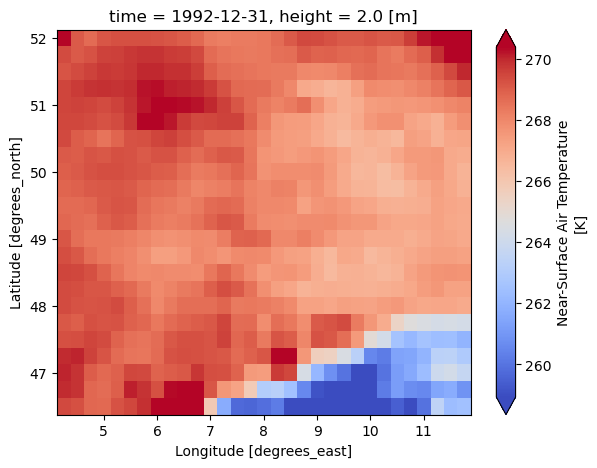

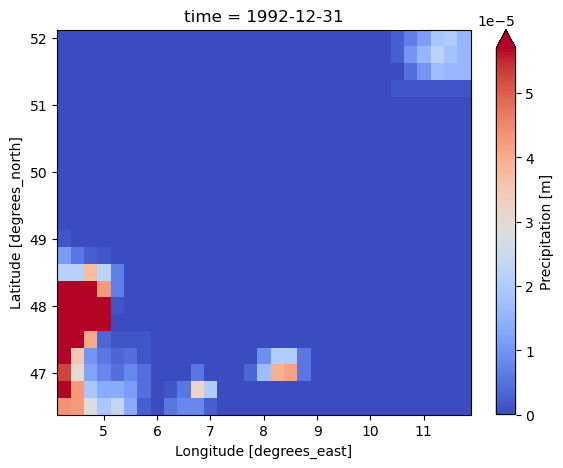

In [5]:
for file_name in [pcrglobwb_forcing.temperatureNC, pcrglobwb_forcing.precipitationNC]:
    dataset = xr.load_dataset(f"{pcrglobwb_forcing.directory}/{file_name}")
    print(dataset)
    print("------------------------")
    var = list(dataset.data_vars.keys())[0]
    dataset[var].isel(time=-1).plot(cmap="coolwarm", robust=True, size=5)